<a href="https://colab.research.google.com/github/saI-Lol/PortifolioProjects/blob/main/Bakery_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
#read data to dataframe
df=pd.read_csv('/content/drive/MyDrive/data/Bakery_sales.csv')

In [ ]:
#view top 5 rows
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
#quick description of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


*No null values*

*Unit_price should be float type*

*date should be datetime type*

*time should also be datetime type*

*ticket_number should be object type*

*standardize article to all upper case*

In [ ]:
#change date column to datetime object
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
#change ticket_number to string object
df['ticket_number']=df['ticket_number'].astype('object')

In [ ]:
#change time to datetime object
df['time']=pd.to_datetime(df['time'], format='%H:%M')

In [ ]:
#standardize article by converting to upper case
df['article']=df['article'].str.upper()

In [ ]:
#convert unit_price to numerical
df['unit_price']=(df['unit_price'].str.split('€').apply(lambda x: x[0]).str.replace(',', '.')).astype('float64')

In [ ]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,1900-01-01 08:38:00,150040.0,BAGUETTE,1.0,0.90
1,1,2021-01-02,1900-01-01 08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,4,2021-01-02,1900-01-01 09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,5,2021-01-02,1900-01-01 09:14:00,150041.0,PAIN,1.0,1.15
4,8,2021-01-02,1900-01-01 09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


In [ ]:
#summary stats for numeric columns
df.describe()

,Unnamed: 0,Quantity,unit_price
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,1.538377,1.662195
std,147501.625992,1.289603,1.722720
min,0.000000,-200.000000,0.000000
25%,127979.000000,1.000000,1.100000
50%,254573.000000,1.000000,1.200000
75%,382911.000000,2.000000,1.500000
max,511395.000000,200.000000,60.000000


*-200 minimum quantity means wrong data*

*most expensive product costs 60 euros*

In [ ]:
#count rows with invalid value for quantity 
len(df[df['Quantity']<0])

1295

In [ ]:
#remove rows with invalid value for quantity
df=df.drop(df[df['Quantity']<0].index)

In [ ]:
#obtain new summary stats for quantity
df['Quantity'].describe()

count    232710.000000
mean          1.556396
std           1.197990
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         200.000000
Name: Quantity, dtype: float64

In [ ]:
#summary stats for string columns
df.describe(include=['object'])

,ticket_number,article
count,232710.0,232710
unique,135686.0,149
top,225766.0,TRADITIONAL BAGUETTE
freq,13.0,67349


*Most bought article is traditional baguette*

*Cutomer with ticket_number 225766.0 is our best customer*

In [ ]:
#summary stats for datetime columns
df.describe(include=['datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,date,time
count,232710,232710
unique,600,683
top,2022-08-14 00:00:00,1900-01-01 11:43:00
freq,997,850
first,2021-01-02 00:00:00,1900-01-01 07:01:00
last,2022-09-30 00:00:00,1900-01-01 20:01:00


*The date 2022-08-14 had the most purchase*

*Range of date is from 2021-01-02 to 2022-09-30*

*Time of purchase is between 7:01 am and 8:01 pm*

In [ ]:
#create new column Total from Quantity*unit_price
df['Total']=df['Quantity']*df['unit_price']

In [ ]:
#import datetime library
#obtain year and month from date column and insert in new column Year_Month
import datetime as dt
df['Year_Month']=df['date'].dt.to_period('M')

In [ ]:
#view top 5 rows of Year_Month column
df['Year_Month'].head()

0    2021-01
1    2021-01
2    2021-01
3    2021-01
4    2021-01
Name: Year_Month, dtype: period[M]

In [ ]:
#group records by 'Year_Month'
#perform sum of Total column for each group
groupby_year_month=df.groupby(df['Year_Month']).agg(Total_per_month=('Total','sum'))

In [ ]:
#Obtain Year and months with highest record Total
groupby_year_month.sort_values(by='Total_per_month', ascending=False).head()

,Total_per_month
Year_Month,
2022-08,54044.10
2021-08,48854.05
2022-07,47026.57
2021-07,42334.10
2022-05,29837.65


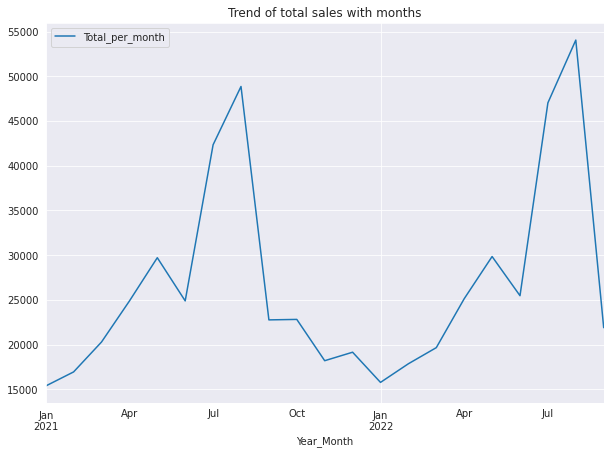

In [ ]:
#visualize the grouped data
groupby_year_month.plot(kind='line', title='Trend of total sales with months', figsize=(10,7))

In [ ]:
#obtain day of week for each record date
df['day_of_week']=df['date'].dt.dayofweek

In [ ]:
#group records by day of week
#obtain sum of Total column for each group
group_day_of_week=df.groupby(df['day_of_week']).agg(Average_sales_by_day=('Total','mean'))

Text(0, 0.5, 'Average Sales')

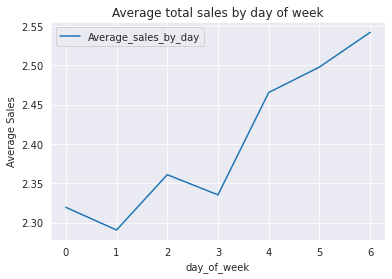

In [ ]:
#visualize the data
group_day_of_week.plot(kind='line', title='Average total sales by day of week')
plt.ylabel('Average Sales')

*On Monday sales are low and fall even lower on Tuesday*

*There is gradual rise and fall in sales between Monday and Thursday*

*Sales generally rise, and keep rising after Thursday*

*Highest average record sales recorded on Sunday*

In [ ]:
#split time column into 7 bins
#provide labels to be used with the bins
bins=list(pd.date_range(start='1900-01-01 07:01:00', end='1900-01-01 21:01:00', freq='2H'))
labels=['7-9am','9-11am','11-1pm','1-3pm','3-5pm','5-7pm','7-9pm']

In [ ]:
#indicate the label for each time
#create new column containing the label
df['time_category']=pd.cut(df['time'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
#find out if 'Unnamed: 0' column is duplicated
df['Unnamed: 0'].duplicated().value_counts()

False    232710
Name: Unnamed: 0, dtype: int64

Text(0, 0.5, 'No of transactions')

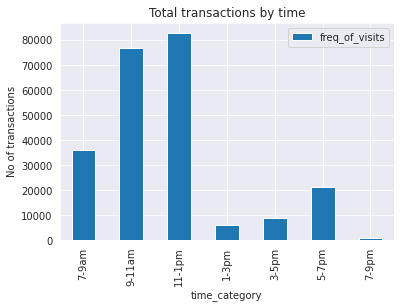

In [ ]:
#group tuples by time_category 
#perform count of each category
#plot the findings
df.groupby(df['time_category']).agg(freq_of_visits=('Unnamed: 0','count')).plot(kind='bar', title='Total transactions by time')
plt.ylabel('No of transactions')

*Majority transactions occur between 11 and 1pm*

*From 7 to 1 number of transactions increases*

*After 1pm, transactions are generally low compared to before 1pm*

*Transactions are at minimum between 7 and 9pm*

*From 1 to 7pm there is gradual increase in number of transactions *

*After 1pm, majority transactions occur between 5 and 7pm*

In [ ]:
#remove occurences with duplicate ticket_number
#repeat the above procedure
#which time range had most customer visits
unique_tickets=df.drop_duplicates(subset=['ticket_number'])
visits_by_time=unique_tickets.groupby('time_category').agg(count_customers_by_time=('Unnamed: 0','count'))
visits_by_time.sort_values(by='count_customers_by_time', ascending=False)

,count_customers_by_time
time_category,
11-1pm,51370
9-11am,43694
7-9am,17907
5-7pm,13133
3-5pm,5217
1-3pm,3785
7-9pm,580


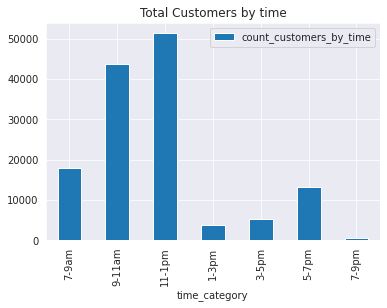

In [ ]:
#plot the findings
visits_by_time.plot(kind='bar', title='Total Customers by time')

*Trend is similar to graph for transactions*